In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Import dataset
1. The data is in excel format, we can convert to csv or read it as excel file
2. After loading the the data, it is important to check the complete information of the data as it can indicate many of the 
    hidden information such as a null value in the column or row
3. Check whether any null values are there. If it is present, then following can be done
     a). Imputing data using imputation method in sklearn
     b). Filling NaN values with mean, median and mode using fillna() method
4. Describe data ---> which can give statistical analysis.


In [91]:
df = pd.read_excel(r"C:/Users/Dickson/Downloads/Data Science tutorials/Data science - Machine learning/flight_fare_pred.xlsx")

pd.set_option('display.max_columns',None)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [93]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [94]:
df.shape

(10683, 11)

In [95]:
df.dropna(inplace = True)

In [96]:
df.shape

(10682, 11)

In [97]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA
From the description of the data we can see that Date_of_journey is ana object data type,
therefore we have to convert this datatype into timestamp so as to use this column properly for prediction.
For this we require pandas to_datetime to convert the object data type to datetime type.

.dt.day method will extract only day of that date

.dt.month method will extract only month of that date

In [98]:
df['Journey_day'] = pd.to_datetime(df.Date_of_Journey,format = '%d/%m/%Y').dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'],format = '%d/%m/%Y').dt.month

In [99]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [100]:
#since we have converted the Date_of_Journey column into integers, we can now drop it as we may not need it
df.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [101]:
#Depature time is the time when the plane leaves the gate
#similar to Date_of_Journey, we can extract values from Dep_Time

#Exreacting hours
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

#Exreacting minutes
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

#now we can drop Dep_Time as it is of no use
df.drop(['Dep_Time'], axis = 1, inplace = True)

In [102]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [103]:
#arrival time is when the plane pulls up to the gate
#similar to Date_of_Journey, we can extract values from Arrival_Time
#Exreacting hours
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

#Exreacting minutes
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

#now we can drop Arrival_Time as it is of no use
df.drop(['Arrival_Time'], axis = 1, inplace = True)

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [104]:
#time taken by plane to reach destination is called duration 
#it is difference between the depature time and arrival time

#assigning and converting duration column into list
duration =  list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2: #check if duration contains only hour or min
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m" #adds 0 minute
        else:
            duration[i] = "0h " + duration[i]  #adds 0 hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0])) #extracts hours
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1])) #extract minutes
    

In [105]:
#adding duration_hours and duration_mins to train_data dataframe
df['duration_hours'] =  duration_hours
df['duration_mins'] = duration_mins

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [106]:
df.drop(['Duration'], axis = 1, inplace = True)
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0


# Handling Categorical Data
One can find many ways to handle categorical data. Some of them are;
1. Nominal data --> data are not in any order --> OneHotEncoder is used in this case
2. Ordinal data --> data are in order --> LabelEncoder is used in this case

In [107]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

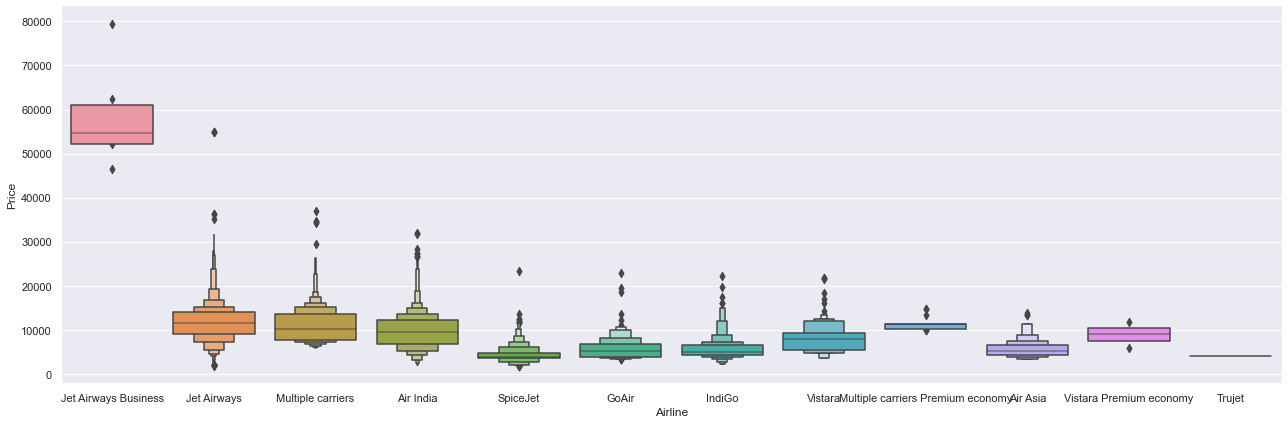

In [108]:
#from the graph we can see that Jet Airways Business has the highest price.
#Apart from from the first airline, almost all are having similar median/ meaning jet airlines is an outlier

#airline vs price
sns.catplot(y= "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind= "boxen", height=6,aspect=3)
plt.show()

In [109]:
#As airline is a nominal categorical data  we will perform OneHotEncoding
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [110]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

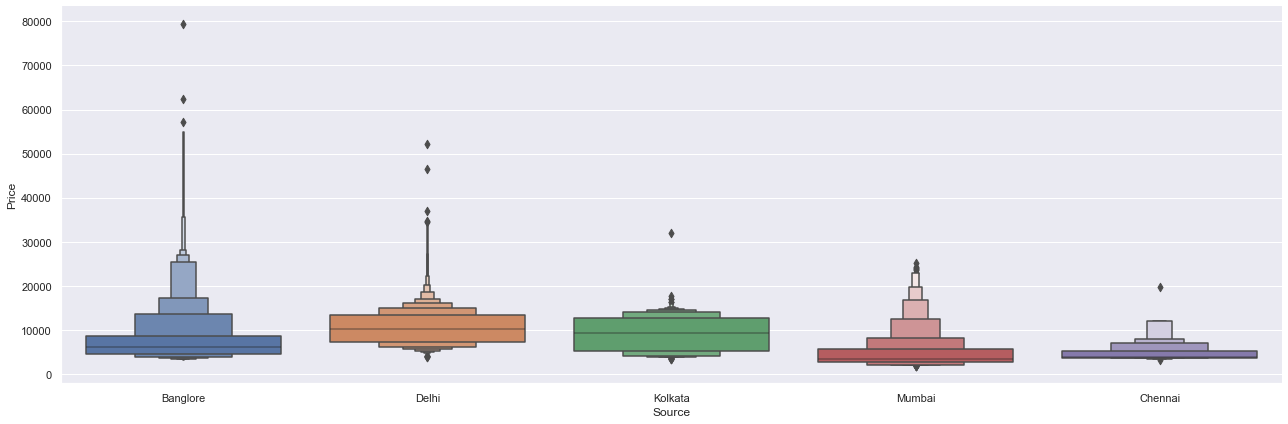

In [111]:
#Source vs price
sns.catplot(y= "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind= "boxen", height=6,aspect=3)
plt.show()

In [112]:
#As source is nominal we will perform OneHotEncoding
Source = df[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [113]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [114]:
#As destination is a nominal categorical variable, we perform OneHotEncoding
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [115]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [116]:
#Additional_info contains almost 80% no_info
#Rout and Total_Stops are related to each other
df.drop(['Route','Additional_Info'], axis = 1, inplace = True)

In [117]:
df.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0


In [118]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [119]:
#As this is the case of Ordinal Categorical type, therefore we perform LabelEncoder
#here values are assigned with corresponding keys
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}, inplace = True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [120]:
#concatenate dataframe --> train_data + Airline + Source + Destination
df =  pd.concat([df, Airline,Source,Destination], axis = 1)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [121]:
df.drop(['Airline','Source','Destination'], axis = 1, inplace = True)
df.head(3)

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [122]:
df.shape

(10682, 30)

# Now we begin working the same on test data
The reason we cant combine test and train data together and work the data feature engineering together is due to data leakage

In [123]:
df_test = pd.read_excel(r"C:/Users/Dickson/Downloads/Data Science tutorials/Data science - Machine learning/flight_fare_pred_test.xlsx")

pd.set_option('display.max_columns',None)
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [124]:
df_test.shape

(2671, 10)

In [125]:
#preprocessing
print("Test Data Info")
print("_"*75)
print(df_test.info())

print()
print()

print("Null Values :")
print("_"*75)
df_test.dropna(inplace = True)
print(df_test.isnull().sum())

Test Data Info
___________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null Values :
___________________________________________________________________________
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [126]:
#EDA
df_test['Journey_day'] = pd.to_datetime(df_test.Date_of_Journey,format = '%d/%m/%Y').dt.day
df_test['Journey_month'] = pd.to_datetime(df_test['Date_of_Journey'],format = '%d/%m/%Y').dt.month

In [127]:
#since we have converted the Date_of_Journey column into integers, we can now drop it as we may not need it
df_test.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [128]:
#Depature time is the time when the plane leaves the gate
#similar to Date_of_Journey, we can extract values from Dep_Time

#Exreacting hours
df_test['Dep_hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour

#Exreacting minutes
df_test['Dep_min'] = pd.to_datetime(df_test['Dep_Time']).dt.minute

#now we can drop Dep_Time as it is of no use
df_test.drop(['Dep_Time'], axis = 1, inplace = True)

In [129]:
#arrival time is when the plane pulls up to the gate
#similar to Date_of_Journey, we can extract values from Arrival_Time
#Exreacting hours
df_test['Arrival_hour'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour

#Exreacting minutes
df_test['Arrival_min'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute

#now we can drop Arrival_Time as it is of no use
df_test.drop(['Arrival_Time'], axis = 1, inplace = True)

In [130]:
#time taken by plane to reach destination is called duration 
#it is difference between the depature time and arrival time

#assigning and converting duration column into list
duration =  list(df_test['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2: #check if duration contains only hour or min
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m" #adds 0 minute
        else:
            duration[i] = "0h " + duration[i]  #adds 0 hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0])) #extracts hours
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1])) #extract minutes

In [131]:
#adding duration_hours and duration_mins to train_data dataframe
df_test['duration_hours'] =  duration_hours
df_test['duration_mins'] = duration_mins

In [132]:
df_test.drop(['Duration'], axis = 1, inplace = True)
df_test.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45


In [133]:
df_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [134]:
#As airline is a nominal categorical data  we will perform OneHotEncoding
Airline = df_test[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [135]:
df_test['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [136]:
#As source is nominal we will perform OneHotEncoding
Source = df_test[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [137]:
df_test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [138]:
#As destination is a nominal categorical variable, we perform OneHotEncoding
Destination = df_test[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [139]:
#Additional_info contains almost 80% no_info
#Rout and Total_Stops are related to each other
df_test.drop(['Route','Additional_Info'], axis = 1, inplace = True)

In [140]:
df_test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [141]:
#As this is the case of Ordinal Categorical type, therefore we perform LabelEncoder
#here values are assigned with corresponding keys
df_test.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}, inplace = True)
df_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [142]:
#concatenate dataframe --> train_data + Airline + Source + Destination
df_test =  pd.concat([df_test, Airline,Source,Destination], axis = 1)
df_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [143]:
df_test.drop(['Airline','Source','Destination'], axis = 1, inplace = True)
df_test.head(3)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


# Feature Selection
Finding out the best feature which will contribute and have good relation with the target variable.
Following are some of the feature selection methods,

1. heatmap
2. feature_importance
3. SelectKBest

In [144]:
df.shape

(10682, 30)

In [145]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [147]:
X = df.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [148]:
y = df.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

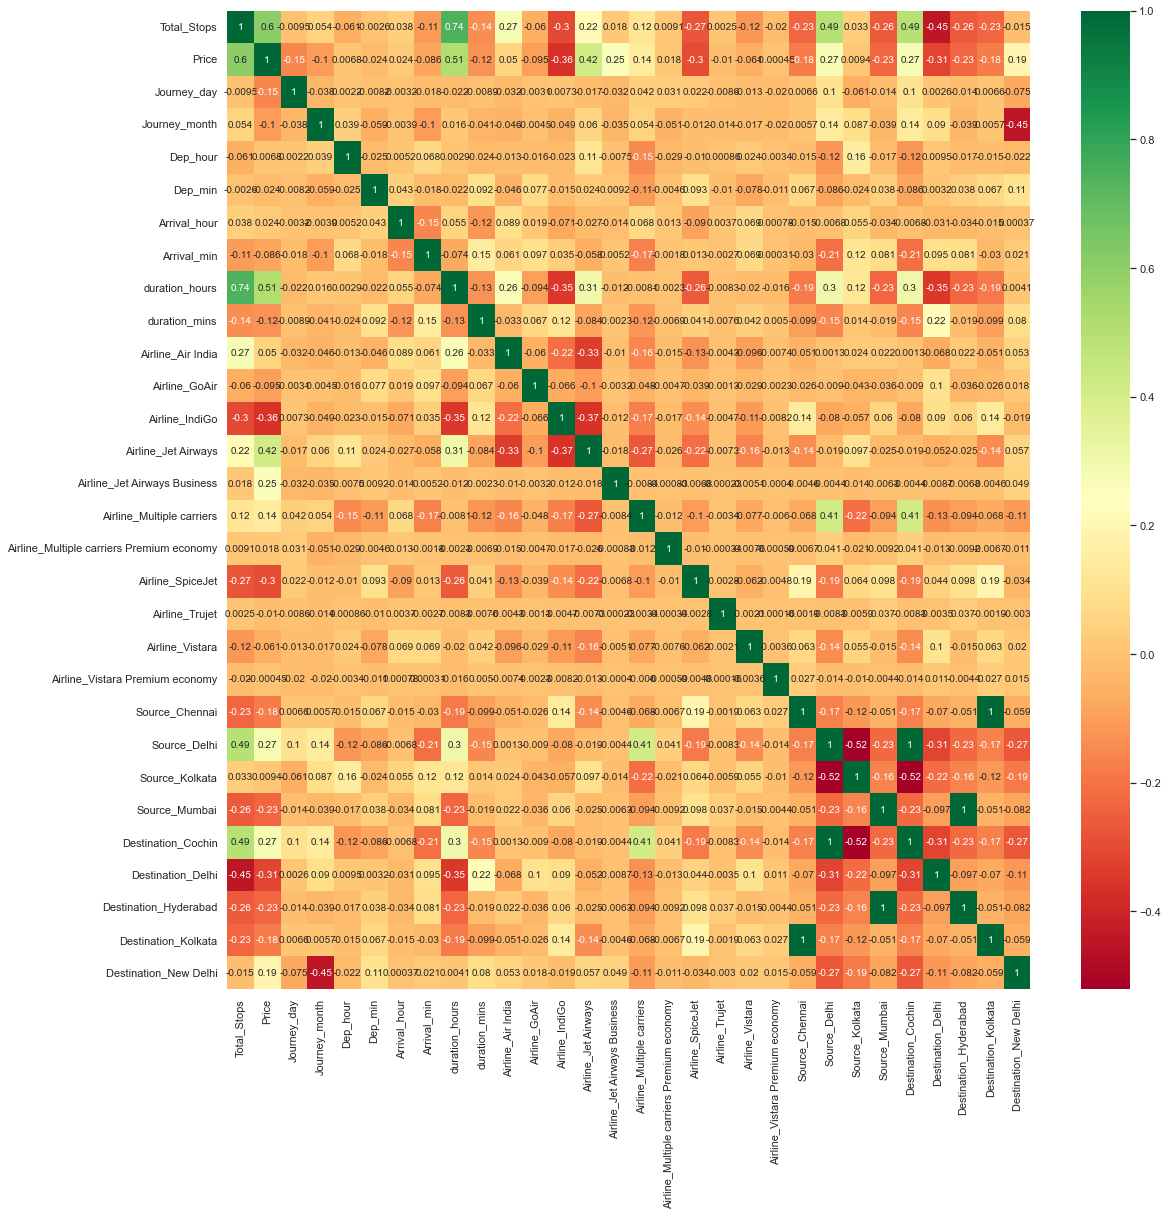

In [152]:
#find the correlation between the dependent and independent attributes
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot =  True, cmap = "RdYlGn")
plt.show()

In [153]:
#import features using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection  = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

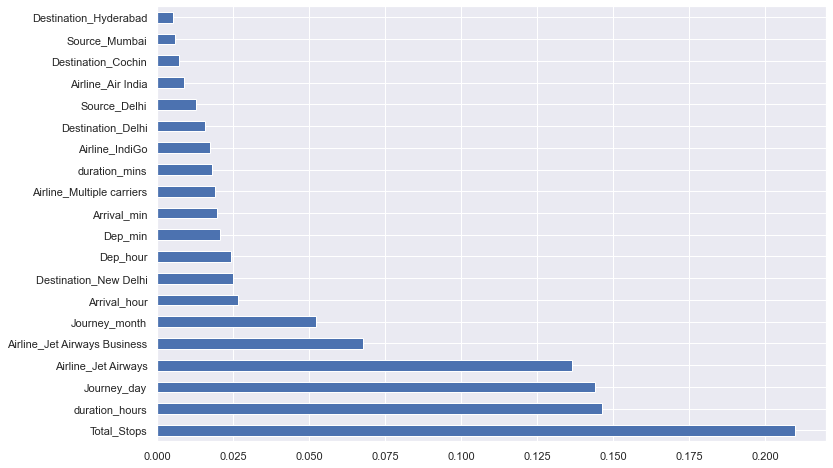

In [154]:
#plot the graph of feature importances for better viasulization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index =X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest
1. split the data into train and test set in order to predict w.r.t X_test.
2. If needed do scaling of data
    .Scalling is not done in rando forest
3. Import the model.
4. Fit the model.
5. Predict w.r.t X_test.
6. In regression check RSME Score.
7. Plot graph

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [156]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [157]:
y_pred = reg_rf.predict(X_test)

In [158]:
reg_rf.score(X_train,y_train)

0.9522549184718052

In [159]:
reg_rf.score(X_test,y_test)

0.8128032537064048

C:\Users\Dickson\anaconda31\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


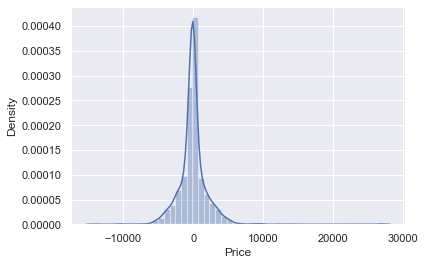

In [160]:
sns.distplot(y_test-y_pred)
plt.show()

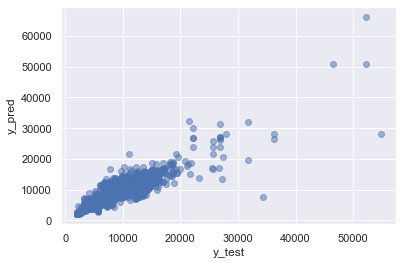

In [161]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [162]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MAE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1228.932394409872
MAE: 4358002.144588593
MAE: 2087.5828473592596


In [163]:
metrics.r2_score(y_test, y_pred)

0.8128032537064048

# Hyperparameter Tuning
1. Choose the following methods for hyperparameter tuning

    i)RandomizedSearchCV --> fast
    
    ii)GridSearchCV
    
2. Assign hyperparameters in form of dictionary
3. Fit the model
4. Check best parameters and best score

In [166]:
#RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#number features to consider at every split
max_features =  ['auto','sqrt']
#maximum number of levels in trees
max_depth =  [int(x) for x in np.linspace(5,30,num=6)]
#minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [167]:
#create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [170]:
#random search of parameters using 5 fold cross validation,
#search across 100 different combinations
rf_random =  RandomizedSearchCV(estimator = reg_rf, param_distributions=random_grid, scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2, random_state=42,n_jobs=1)

In [171]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  22.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  19.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  17.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  19.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  26.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [172]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [174]:
prediction =  rf_random.predict(X_test)

C:\Users\Dickson\anaconda31\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


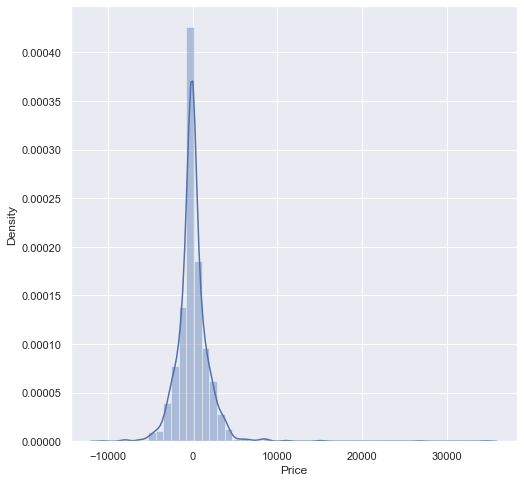

In [175]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [176]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MAE:', metrics.mean_squared_error(y_test, prediction))
print('MAE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1200.4358012340797
MAE: 4173265.203466281
MAE: 2042.857117731507


# Save the model to reuse it again



In [177]:
import pickle
#open file where you want to save the model
file = open('flight_prf.pkl', 'wb')
#dumb information to that file
pickle.dump(rf_random, file)

In [187]:
model =  open('C:/Users/Dickson/Desktop/Flight/flight_prf.pkl', 'rb')
forest = pickle.load(model)

In [189]:
y_prediction = forest.predict(X_test)

In [190]:
metrics.r2_score(y_test, y_prediction)

0.8207385766252496